## Visual Comparison Between Different Classification Methods in Shogun

Notebook by Youssef Emad El-Din (Github ID: <a href="https://github.com/youssef-emad/">youssef-emad</a>)

This notebook demonstrates different classification methods in Shogun. The point is to compare and visualize the decision boundaries of different classifiers on two different datasets, where one is linear separable, and one is not.

1. <a href ="#section1">Data Generation and Visualization</a>
2. <a href ="#section2">Support Vector Machine</a>
 1. <a href ="#section2a">Linear SVM</a>
 2. <a href ="#section2b">Gaussian Kernel</a>
 3. <a href ="#section2c">Sigmoid Kernel</a>
 4. <a href ="#section2d">Polynomial Kernel</a>
3. <a href ="#section3">Naive Bayes</a>
4. <a href ="#section4">Nearest Neighbors</a>
5. <a href ="#section5">Linear Discriminant Analysis</a>
6. <a href ="#section6">Quadratic Discriminat Analysis</a>
7. <a href ="#section7">Gaussian Process</a>
 1. <a href ="#section7a">Logit Likelihood model</a>
 2. <a href ="#section7b">Probit Likelihood model</a>
8. <a href ="#section8">Putting It All Together</a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shogun as sg
%matplotlib inline

SHOGUN_DATA_DIR=os.getenv('SHOGUN_DATA_DIR', '../../../data')

In [ ]:
#Needed lists for the final plot
classifiers_linear = []*10
classifiers_non_linear = []*10
classifiers_names = []*10
fadings = []*10

## <a id = "section1">Data Generation and Visualization</a>

Transformation of features to Shogun format using <a href="http://www.shogun-toolbox.org/doc/en/current/classshogun_1_1DenseFeatures.html">RealFeatures</a> and <a href="http://www.shogun-toolbox.org/doc/en/latest/classshogun_1_1BinaryLabels.html">BinaryLables</a> classes.

In [ ]:
shogun_feats_linear = sg.create_features(sg.read_csv(os.path.join(SHOGUN_DATA_DIR, 'toy/classifier_binary_2d_linear_features_train.dat')))
shogun_labels_linear = sg.create_labels(sg.read_csv(os.path.join(SHOGUN_DATA_DIR, 'toy/classifier_binary_2d_linear_labels_train.dat')))

shogun_feats_non_linear = sg.create_features(sg.read_csv(os.path.join(SHOGUN_DATA_DIR, 'toy/classifier_binary_2d_nonlinear_features_train.dat')))
shogun_labels_non_linear = sg.create_labels(sg.read_csv(os.path.join(SHOGUN_DATA_DIR, 'toy/classifier_binary_2d_nonlinear_labels_train.dat')))

feats_linear = shogun_feats_linear.get('feature_matrix')
labels_linear = shogun_labels_linear.get('labels')

feats_non_linear = shogun_feats_non_linear.get('feature_matrix')
labels_non_linear = shogun_labels_non_linear.get('labels')

Data visualization methods.

In [ ]:
def plot_binary_data(plot,X_train, y_train):
    """
    This function plots 2D binary data with different colors for different labels.
    """
    plot.xlabel(r"$x$")
    plot.ylabel(r"$y$")
    plot.plot(X_train[0, np.argwhere(y_train == 1)], X_train[1, np.argwhere(y_train == 1)], 'ro')
    plot.plot(X_train[0, np.argwhere(y_train == -1)], X_train[1, np.argwhere(y_train == -1)], 'bo')

In [ ]:
def compute_plot_isolines(classifier,feats,size=200,fading=True):
    """
    This function computes the classification of points on the grid
    to get the decision boundaries used in plotting
    """
    x1 = np.linspace(1.2*min(feats[0]), 1.2*max(feats[0]), size)
    x2 = np.linspace(1.2*min(feats[1]), 1.2*max(feats[1]), size)

    x, y = np.meshgrid(x1, x2)

    plot_features = sg.create_features(np.array((np.ravel(x), np.ravel(y))))
    
    if fading == True:
        plot_labels = classifier.apply_binary(plot_features).get('current_values')
    else:
        plot_labels = classifier.apply(plot_features).get('labels')
    z = plot_labels.reshape((size, size))
    return x,y,z

In [ ]:
def plot_model(plot,classifier,features,labels,fading=True):
    """
    This function plots an input classification model
    """
    x,y,z = compute_plot_isolines(classifier,features,fading=fading)
    plot.pcolor(x,y,z,cmap='RdBu_r')
    plot.contour(x, y, z, linewidths=1, colors='black')
    plot_binary_data(plot,features, labels)
    

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Linear Features")
plot_binary_data(plt,feats_linear, labels_linear)
plt.subplot(122)
plt.title("Non Linear Features")
plot_binary_data(plt,feats_non_linear, labels_non_linear)

## <a id="section2" href="http://www.shogun-toolbox.org/doc/en/latest/classshogun_1_1SVM.html">Support Vector Machine</a>

<a id="section2a" href="http://www.shogun-toolbox.org/doc/en/latest/classshogun_1_1LibLinear.html">Linear SVM</a>

Shogun provide <a href="http://www.shogun-toolbox.org/doc/en/latest/classshogun_1_1LibLinear.html">Liblinear</a> which is a library for large-scale linear learning focusing on SVM used for classification

In [ ]:
plt.figure(figsize=(15,5))
c = 0.5
epsilon = 1e-3

svm_linear = sg.create_machine("LibLinear", C1=c, C2=c, 
                        labels=shogun_labels_linear, 
                        epsilon=epsilon,
                        liblinear_solver_type="L2R_L2LOSS_SVC")
svm_linear.train(shogun_feats_linear)
classifiers_linear.append(svm_linear)
classifiers_names.append("SVM Linear")
fadings.append(True)

plt.subplot(121)
plt.title("Linear SVM - Linear Features")
plot_model(plt,svm_linear,feats_linear,labels_linear)

svm_non_linear = sg.create_machine("LibLinear", C1=c, C2=c, 
                            labels=shogun_labels_non_linear,
                            epsilon=epsilon,
                            liblinear_solver_type="L2R_L2LOSS_SVC")
svm_non_linear.train(shogun_feats_non_linear)
classifiers_non_linear.append(svm_non_linear)

plt.subplot(122)
plt.title("Linear SVM - Non Linear Features")
plot_model(plt,svm_non_linear,feats_non_linear,labels_non_linear)

## SVM - Kernels

Shogun provides many options for using kernel functions. Kernels in Shogun are based on two classes which are <a href="http://www.shogun-toolbox.org/doc/en/latest/classshogun_1_1Kernel.html">Kernel</a> and <a href="http://www.shogun-toolbox.org/doc/en/latest/classshogun_1_1KernelMachine.html">KernelMachine</a> base class.

<a id ="section2b" href = "http://www.shogun-toolbox.org/doc/en/latest/classshogun_1_1GaussianKernel.html">Gaussian Kernel</a>

In [ ]:
gaussian_c = 0.7

gaussian_kernel_linear = sg.create_kernel("GaussianKernel", width=20)
gaussian_svm_linear = sg.create_machine('LibSVM', C1=gaussian_c, C2=gaussian_c, 
                                 kernel=gaussian_kernel_linear, labels=shogun_labels_linear)
gaussian_svm_linear.train(shogun_feats_linear)
classifiers_linear.append(gaussian_svm_linear)
fadings.append(True)

gaussian_kernel_non_linear = sg.create_kernel("GaussianKernel", width=10)
gaussian_svm_non_linear=sg.create_machine('LibSVM', C1=gaussian_c, C2=gaussian_c, 
                                   kernel=gaussian_kernel_non_linear, labels=shogun_labels_non_linear)
gaussian_svm_non_linear.train(shogun_feats_non_linear)
classifiers_non_linear.append(gaussian_svm_non_linear)
classifiers_names.append("SVM Gaussian Kernel")

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("SVM Gaussian Kernel - Linear Features")
plot_model(plt,gaussian_svm_linear,feats_linear,labels_linear)

plt.subplot(122)
plt.title("SVM Gaussian Kernel - Non Linear Features")
plot_model(plt,gaussian_svm_non_linear,feats_non_linear,labels_non_linear)

<a id ="section2c" href="http://www.shogun-toolbox.org/doc/en/latest/classshogun_1_1CSigmoidKernel.html">Sigmoid Kernel</a>

In [ ]:
sigmoid_c = 0.9


sigmoid_kernel_linear = sg.create_kernel("SigmoidKernel", cache_size=200, gamma=1, coef0=0.5)
sigmoid_kernel_linear.init(shogun_feats_linear, shogun_feats_linear)
sigmoid_svm_linear = sg.create_machine('LibSVM', C1=sigmoid_c, C2=sigmoid_c, 
                                kernel=sigmoid_kernel_linear, labels=shogun_labels_linear)
sigmoid_svm_linear.train()
classifiers_linear.append(sigmoid_svm_linear)
classifiers_names.append("SVM Sigmoid Kernel")
fadings.append(True)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("SVM Sigmoid Kernel - Linear Features")
plot_model(plt,sigmoid_svm_linear,feats_linear,labels_linear)

sigmoid_kernel_non_linear = sg.create_kernel("SigmoidKernel", cache_size=400, gamma=2.5, coef0=2)
sigmoid_kernel_non_linear.init(shogun_feats_non_linear, shogun_feats_non_linear)
sigmoid_svm_non_linear = sg.create_machine('LibSVM', C1=sigmoid_c, C2=sigmoid_c, 
                                    kernel=sigmoid_kernel_non_linear, labels=shogun_labels_non_linear)
sigmoid_svm_non_linear.train()
classifiers_non_linear.append(sigmoid_svm_non_linear)

plt.subplot(122)
plt.title("SVM Sigmoid Kernel - Non Linear Features")
plot_model(plt,sigmoid_svm_non_linear,feats_non_linear,labels_non_linear)

<a id ="section2d" href="http://www.shogun-toolbox.org/doc/en/latest/classshogun_1_1CPolyKernel.html">Polynomial Kernel</a>

In [ ]:
poly_c = 0.5
degree = 4

poly_kernel_linear = sg.create_kernel('PolyKernel', degree=degree, c=1.0)
poly_kernel_linear.init(shogun_feats_linear, shogun_feats_linear)
poly_svm_linear = sg.create_machine('LibSVM', C1=poly_c, C2=poly_c, 
                             kernel=poly_kernel_linear, labels=shogun_labels_linear)
poly_svm_linear.train()
classifiers_linear.append(poly_svm_linear)
classifiers_names.append("SVM Polynomial kernel")
fadings.append(True)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("SVM Polynomial Kernel - Linear Features")
plot_model(plt,poly_svm_linear,feats_linear,labels_linear)

poly_kernel_non_linear = sg.create_kernel('PolyKernel', degree=degree, c=1.0)
poly_kernel_non_linear.init(shogun_feats_non_linear, shogun_feats_non_linear)
poly_svm_non_linear = sg.create_machine('LibSVM', C1=poly_c, C2=poly_c, 
                                 kernel=poly_kernel_non_linear, labels=shogun_labels_non_linear)
poly_svm_non_linear.train()
classifiers_non_linear.append(poly_svm_non_linear)

plt.subplot(122)
plt.title("SVM Polynomial Kernel - Non Linear Features")
plot_model(plt,poly_svm_non_linear,feats_non_linear,labels_non_linear)

## <a id ="section3" href="http://www.shogun-toolbox.org/doc/en/latest/classshogun_1_1GaussianNaiveBayes.html">Naive Bayes</a>

In [ ]:
multiclass_labels_linear = shogun_labels_linear.get('labels')
for i in range(0,len(multiclass_labels_linear)):
    if multiclass_labels_linear[i] == -1:
        multiclass_labels_linear[i] = 0

multiclass_labels_non_linear = shogun_labels_non_linear.get('labels')
for i in range(0,len(multiclass_labels_non_linear)):
    if multiclass_labels_non_linear[i] == -1:
        multiclass_labels_non_linear[i] = 0


shogun_multiclass_labels_linear = sg.MulticlassLabels(multiclass_labels_linear)
shogun_multiclass_labels_non_linear = sg.MulticlassLabels(multiclass_labels_non_linear)

naive_bayes_linear = sg.create_machine("GaussianNaiveBayes")
naive_bayes_linear.put('features', shogun_feats_linear)
naive_bayes_linear.put('labels', shogun_multiclass_labels_linear)
naive_bayes_linear.train()
classifiers_linear.append(naive_bayes_linear)
classifiers_names.append("Naive Bayes")
fadings.append(False)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Naive Bayes - Linear Features")
plot_model(plt,naive_bayes_linear,feats_linear,labels_linear,fading=False)

naive_bayes_non_linear = sg.create_machine("GaussianNaiveBayes")
naive_bayes_non_linear.put('features', shogun_feats_non_linear)
naive_bayes_non_linear.put('labels', shogun_multiclass_labels_non_linear)
naive_bayes_non_linear.train()
classifiers_non_linear.append(naive_bayes_non_linear)

plt.subplot(122)
plt.title("Naive Bayes - Non Linear Features")
plot_model(plt,naive_bayes_non_linear,feats_non_linear,labels_non_linear,fading=False)

## <a id ="section4" href="http://www.shogun-toolbox.org/doc/en/current/classshogun_1_1KNN.html">Nearest Neighbors</a>

In [ ]:
number_of_neighbors = 10

distances_linear = sg.create_distance('EuclideanDistance')
distances_linear.init(shogun_feats_linear, shogun_feats_linear)
knn_linear = sg.create_machine("KNN", k=number_of_neighbors, distance=distances_linear, 
                               labels=shogun_labels_linear)
knn_linear.train()
classifiers_linear.append(knn_linear)
classifiers_names.append("Nearest Neighbors")
fadings.append(False)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Nearest Neighbors - Linear Features")
plot_model(plt,knn_linear,feats_linear,labels_linear,fading=False)

distances_non_linear = sg.create_distance('EuclideanDistance')
distances_non_linear.init(shogun_feats_non_linear, shogun_feats_non_linear)
knn_non_linear = sg.create_machine("KNN", k=number_of_neighbors, distance=distances_non_linear, 
                                   labels=shogun_labels_non_linear)
knn_non_linear.train()
classifiers_non_linear.append(knn_non_linear)

plt.subplot(122)
plt.title("Nearest Neighbors - Non Linear Features")
plot_model(plt,knn_non_linear,feats_non_linear,labels_non_linear,fading=False)

## <a id ="section5" href="http://www.shogun-toolbox.org/doc/en/current/classshogun_1_1CLDA.html">Linear Discriminant Analysis</a>

In [ ]:
gamma = 0.1

lda_linear = sg.create_machine('LDA', gamma=gamma, labels=shogun_labels_linear)
lda_linear.train(shogun_feats_linear)
classifiers_linear.append(lda_linear)
classifiers_names.append("LDA")
fadings.append(True)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("LDA - Linear Features")
plot_model(plt,lda_linear,feats_linear,labels_linear)

lda_non_linear = sg.create_machine('LDA', gamma=gamma, labels=shogun_labels_non_linear)
lda_non_linear.train(shogun_feats_non_linear)
classifiers_non_linear.append(lda_non_linear)

plt.subplot(122)
plt.title("LDA - Non Linear Features")
plot_model(plt,lda_non_linear,feats_non_linear,labels_non_linear)

## <a id ="section6" href="http://www.shogun-toolbox.org/doc/en/current/classshogun_1_1QDA.html">Quadratic Discriminant Analysis</a>

In [ ]:
qda_linear = sg.create_machine("QDA", labels=shogun_multiclass_labels_linear)
qda_linear.train(shogun_feats_linear)
classifiers_linear.append(qda_linear)
classifiers_names.append("QDA")
fadings.append(False)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("QDA - Linear Features")
plot_model(plt,qda_linear,feats_linear,labels_linear,fading=False)

qda_non_linear = sg.create_machine("QDA", labels=shogun_multiclass_labels_non_linear)
qda_non_linear.train(shogun_feats_non_linear)
classifiers_non_linear.append(qda_non_linear)

plt.subplot(122)
plt.title("QDA - Non Linear Features")
plot_model(plt,qda_non_linear,feats_non_linear,labels_non_linear,fading=False)

## <a id ="section7" href="http://www.shogun-toolbox.org/doc/en/current/classshogun_1_1GaussianProcessBinaryClassification.html">Gaussian Process</a>

<a id ="section7a">Logit Likelihood model</a>

Shogun's <a href= "http://www.shogun-toolbox.org/doc/en/current/classshogun_1_1LogitLikelihood.html">LogitLikelihood</a> and <a href="http://www.shogun-toolbox.org/doc/en/current/classshogun_1_1EPInferenceMethod.html">EPInferenceMethod</a> classes are used.

In [ ]:
# create Gaussian kernel with width = 5.0
kernel = sg.create_kernel("GaussianKernel", width=5.0)
# create zero mean function
zero_mean = sg.create_gp_mean("ZeroMean")
# create logit likelihood model
likelihood = sg.create_gp_likelihood("LogitLikelihood")
# specify EP approximation inference method
inference_model_linear = sg.create_gp_inference("EPInferenceMethod",kernel=kernel, 
                                                features=shogun_feats_linear, 
                                                mean_function=zero_mean, 
                                                labels=shogun_labels_linear, 
                                                likelihood_model=likelihood)
# create and train GP classifier, which uses Laplace approximation
gaussian_logit_linear = sg.create_gaussian_process("GaussianProcessClassification", inference_method=inference_model_linear)
gaussian_logit_linear.train()
classifiers_linear.append(gaussian_logit_linear)
classifiers_names.append("Gaussian Process Logit")
fadings.append(True)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Gaussian Process - Logit - Linear Features")
plot_model(plt,gaussian_logit_linear,feats_linear,labels_linear)

inference_model_non_linear = sg.create_gp_inference("EPInferenceMethod", kernel=kernel, 
                                                    features=shogun_feats_non_linear, 
                                                    mean_function=zero_mean, 
                                                    labels=shogun_labels_non_linear, 
                                                    likelihood_model=likelihood)
gaussian_logit_non_linear = sg.create_gaussian_process("GaussianProcessClassification", 
                                                       inference_method=inference_model_non_linear)
gaussian_logit_non_linear.train()
classifiers_non_linear.append(gaussian_logit_non_linear)

plt.subplot(122)
plt.title("Gaussian Process - Logit - Non Linear Features")
plot_model(plt,gaussian_logit_non_linear,feats_non_linear,labels_non_linear)

<a id ="section7b">Probit Likelihood model</a> 

Shogun's <a href="http://www.shogun-toolbox.org/doc/en/current/classshogun_1_1ProbitLikelihood.html">ProbitLikelihood</a> class is used.

In [ ]:
likelihood = sg.create_gp_likelihood("ProbitLikelihood")

inference_model_linear = sg.create_gp_inference("EPInferenceMethod", kernel=kernel, 
                                                features=shogun_feats_linear, 
                                                mean_function=zero_mean, 
                                                labels=shogun_labels_linear, 
                                                likelihood_model=likelihood)
gaussian_probit_linear = sg.create_gaussian_process("GaussianProcessClassification", 
                                                    inference_method=inference_model_linear)
gaussian_probit_linear.train()
classifiers_linear.append(gaussian_probit_linear)
classifiers_names.append("Gaussian Process Probit")
fadings.append(True)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Gaussian Process - Probit - Linear Features")
plot_model(plt,gaussian_probit_linear,feats_linear,labels_linear)

inference_model_non_linear = sg.create_gp_inference("EPInferenceMethod", kernel=kernel, 
                                                    features=shogun_feats_non_linear, 
                                                    mean_function=zero_mean, 
                                                    labels=shogun_labels_non_linear, 
                                                    likelihood_model=likelihood)
gaussian_probit_non_linear = sg.create_gaussian_process("GaussianProcessClassification", 
                                                        inference_method=inference_model_non_linear)
gaussian_probit_non_linear.train()
classifiers_non_linear.append(gaussian_probit_non_linear)

plt.subplot(122)
plt.title("Gaussian Process - Probit - Non Linear Features")
plot_model(plt,gaussian_probit_non_linear,feats_non_linear,labels_non_linear)

## <a id="section8">Putting It All Together</a>

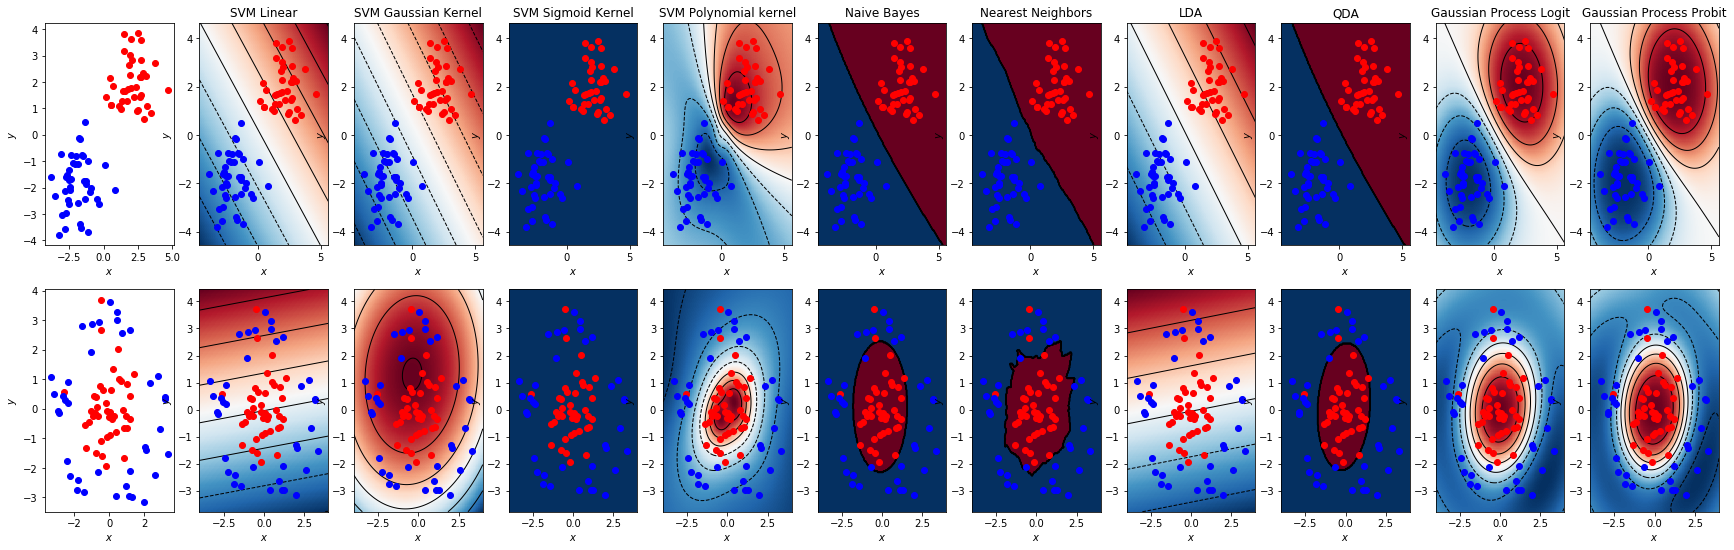

In [18]:
figure = plt.figure(figsize=(30,9))
plt.subplot(2,11,1)
plot_binary_data(plt,feats_linear, labels_linear)
for i in range(0,10):
    plt.subplot(2,11,i+2)
    plt.title(classifiers_names[i])
    plot_model(plt,classifiers_linear[i],feats_linear,labels_linear,fading=fadings[i])

plt.subplot(2,11,12)
plot_binary_data(plt,feats_non_linear, labels_non_linear)

for i in range(0,10):
   plt.subplot(2,11,13+i)
   plot_model(plt,classifiers_non_linear[i],feats_non_linear,labels_non_linear,fading=fadings[i])